In [1]:
import os
import time
import sys
import scipy
import glob
import importlib
import _pickle as pkl
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import shutil
import scipy.stats as spstats

import trajectory as traj
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=12)
pl.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

plot_style = 'white'
util.set_sns_style(style=plot_style)
bg_color = 'k' if plot_style=='white' else 'w' 
boutdir_palette = {'inodor': bg_color, 'inbound': 'c', 'outbound': 'm'}
plot_st = '_yt' if plot_style == 'white' else ''
instrip_palette = {True: 'r', False: 'cornflowerblue'}

In [3]:
# rootdir='/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
rootdir = util.get_rootdir()
print(rootdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data


In [4]:
# src0 = os.path.join(rootdir, 'All_constant_all_increasing_gradient')
# dst0 = os.path.join(rootdir, 'jyr', 'vertical_strip', 'selected')
rootdir = rootdir.replace('Data', 'Data_curated')
print(rootdir)
src0 = os.path.join(rootdir,'Constant and increasing gradient ') # 'All_constant_all_increasing_gradient')
dst0 = os.path.join(rootdir.replace('Data_curated', 'Data'), 'jyr', 'vertical_strip', 'curated')
if not os.path.exists(dst0):
    os.makedirs(dst0)
print(dst0)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data_curated
/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated


In [5]:
srcdir = dst0
# all_logfiles = glob.glob(os.path.join(srcdir, '*', '*.log'))
# len(all_logfiles)
print(srcdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated


In [9]:
figid = srcdir.split('/My Drive')[-1]
print(figid)

figdir = os.path.join(srcdir, 'figures')
print(figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated
/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated/figures


In [7]:
create_new=False
combined_datafile = os.path.join(srcdir, 'combined.pkl')
if not create_new:
    print("loading")
    try:
        with open(combined_datafile, 'rb') as f:
            df0_all = pkl.load(f)
        print(df0_all.shape)
    except Exception as e:
        print(e)
        create_new=True
print(create_new)

loading
(2995799, 42)
False


In [8]:
df0_all['filename'].nunique()

90

# Find ETs

In [81]:
strip_width=50
strip_sep=1000
#max_instrip_upwind_dist = 500 #250 #250
#min_sum_instrip_upwind_dist = 250
#min_global_upwind_dist = 300
max_crossovers = 1
max_instrip_upwind_percent=0.5
min_outside_bouts=5
max_crossover_to_dist_ratio=1/500
min_global_upwind_dist=400

ets=[]
for fn, df_ in df0_all.groupby('filename'):
    odor_bounds = butil.find_strip_borders(df_, 
                                            entry_ix=df_[df_['instrip']].iloc[0].name,
                                            strip_width=strip_width, strip_sep=strip_sep)
    et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(df_,
                                        odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
                                        max_instrip_upwind_percent=max_instrip_upwind_percent, 
                                        max_crossovers=max_crossovers, 
                                        max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
                                        min_outside_bouts=min_outside_bouts,
                                        min_global_upwind_dist=min_global_upwind_dist)
    if len(et_bouts)>0:
        ets.append(fn)
# aggr_figname = 'traj_max-crossovers-{}_min-outside-bouts-{}_max-instrip-upwind-perc-{}_n{}'\
#                 .format(max_crossovers, min_outside_bouts, str(max_instrip_upwind_percent).replace('.', ''), len(ets))
aggr_figname = 'ets_max-crossovers-{}_min-outside-bouts-{}_max-crossoverdist_ratio-{}_min-global-upwind-{}_max-instrip-upwind-perc-{}_n{}'\
                .format(max_crossovers, min_outside_bouts, '1per500mm', min_global_upwind_dist, max_instrip_upwind_percent, len(ets))
print(aggr_figname)

not et: 0
not et: 0
not et: 0
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
not et: 0
Is ET: 0 True
Is ET: 0 True
not et: 0
Is ET: 0 True
not et: 0
not et: 0
not et: 0
Is ET: 0 True
not et: 0
Is ET: 0 True
not et: 0
cannot convert the series to <class 'float'>
not et: 0
Is ET: 0 True
not et: 0
Is ET: 0 True
not et: 0
not et: 0
not et: 0
not et: 0
cannot convert the series to <class 'float'>
not et: 0
Is ET: 0 True
cannot convert the series to <class 'float'>
not et: 0
not et: 0
cannot convert the series to <class 'float'>
not et: 0
not et: 0
not et: 0
cannot convert the series to <class 'float'>
not et: 0
cannot convert the series to <class 'float'>
not et: 0
not et: 0
Is ET: 0 True
not et: 0
not et: 0
cannot convert the series to <class 'float'>
not et: 0
not et: 0
Is ET: 0 True
Is ET: 0 True
cannot convert the series to <class 'float'>
not et: 0
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
not et: 0
Is ET: 0 True
not et: 0
not et: 0
Is ET: 0 True
Is ET: 0 True
Is

In [82]:
# aggr_figname = 'ets_min-outside-bouts-{}_max-crossoverdist_ratio-{}_min-global-upwind-{}_max-instrip-upwind-perc-{}_n{}'\
#                 .format(min_outside_bouts, '1per500mm', min_global_upwind_dist, max_instrip_upwind_percent, len(ets))
print(aggr_figname)

ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40


In [83]:
etdf = df0_all[df0_all['filename'].isin(ets)].copy()
etdf = etdf.reset_index(drop=True)
print(len(ets))

40


In [298]:
curr_figdir = os.path.join(srcdir, aggr_figname)
if not os.path.exists(curr_figdir):
    os.makedirs(curr_figdir)
print(curr_figdir)


/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated/ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40


In [283]:
curr_figdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated/ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40'

<IPython.core.display.Javascript object>


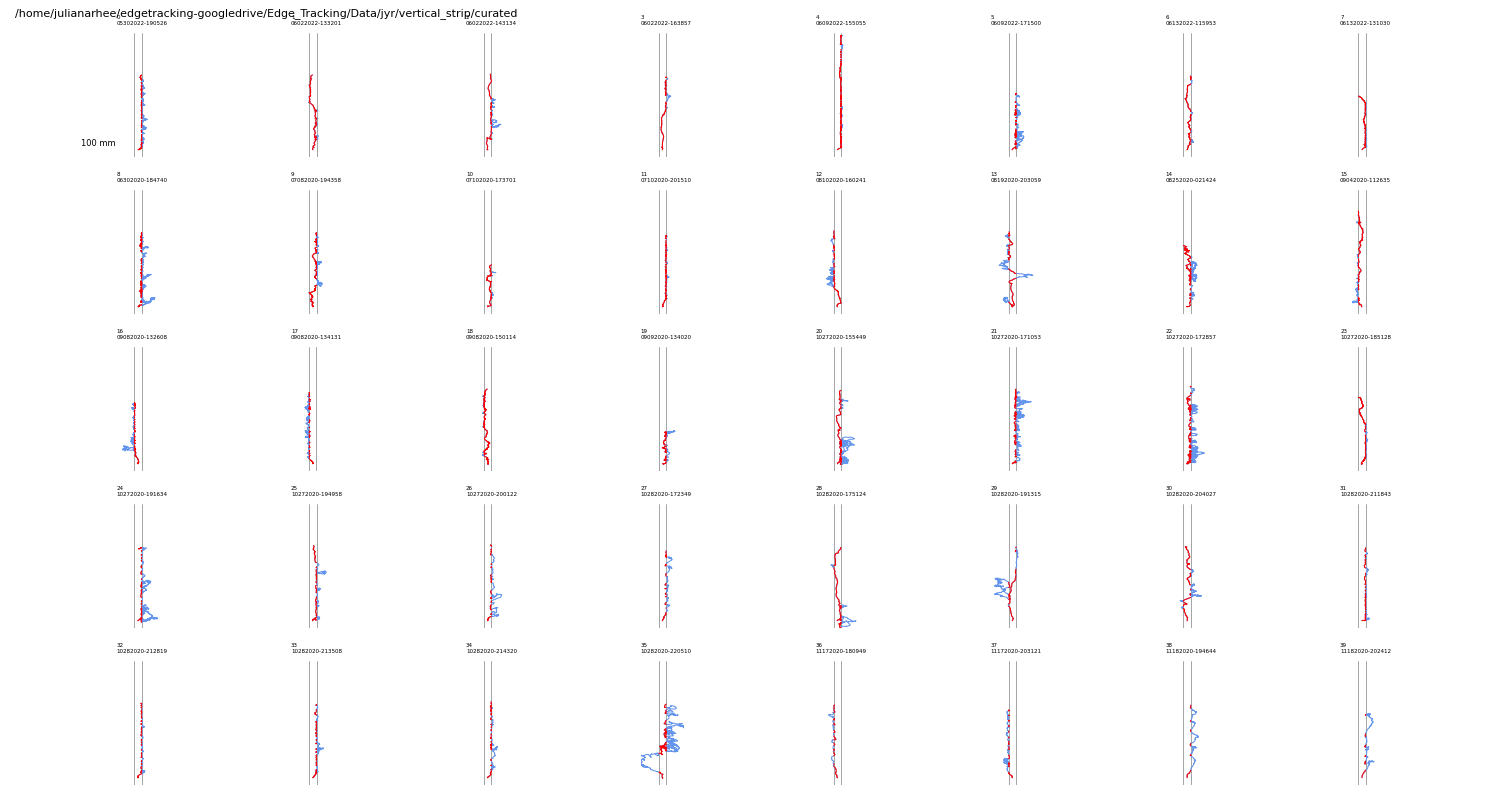

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated/ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40/ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40_yt.png


In [284]:
# curr_figdir = os.path.join(srcdir, 'ets')
nr=5
nc=8
fig, axn = pl.subplots(nr, nc, figsize=(15,8), sharex=True, sharey=True)
for fi, (fn, df_) in enumerate(etdf.groupby('filename')):
    if fi >= nr*nc:
        break
    ax=axn.flat[fi]
    # PLOT
    last_ = df_[df_['instrip']]['boutnum'].max()
    plotdf = df_[df_['boutnum']<=last_].copy()
    putil.plot_zeroed_trajectory(plotdf, ax=ax, traj_lw=.75, odor_lw=.5,
                                 strip_width=50, strip_sep=1000,
                                 main_col=instrip_palette[False], bool_colors=[instrip_palette[True]])
    # legend
    ax.axis('off')
    if fi==0:
        leg_xpos=-150; leg_ypos=0; leg_scale=100
        putil.vertical_scalebar(ax, leg_xpos=leg_xpos, leg_ypos=leg_ypos)
    #ax.set_box_aspect(3)
    ax.set_xlim([-150, 150])
    ax.set_ylim([-100, 1600])
    ax.set_aspect(0.5)
    ax.set_title('{}\n{}'.format(fi, fn), fontsize=4, loc='left')
for ax in axn.flat[fi:]:
    ax.axis('off')
pl.tight_layout()
util.label_figure(fig, figid)
pl.savefig(os.path.join(curr_figdir, '{}_numbered.png'.format(aggr_figname)))
print(os.path.join(curr_figdir, '{}{}.png'.format(aggr_figname, plot_st)))

In [87]:

n_flies = etdf['fly_id'].nunique()
n_files = etdf['filename'].nunique()
print("N flies: {} | N files: {}".format(n_flies, n_files))

etdf[['fly_id', 'condition', 'filename']].drop_duplicates().groupby('condition').count()


N flies: 40 | N files: 40


,fly_id,filename
condition,,
constant,22,22
gradient,18,18


# Flip trajectories

In [89]:
d_list=[]
for fn, df_ in etdf.groupby('filename'):
    tmpdf = df_.copy().reset_index(drop=True)
    # odor boundaries
    odor_bounds = butil.find_strip_borders(tmpdf, 
                                        entry_ix=tmpdf[tmpdf['instrip']].iloc[0].name,
                                        strip_width=strip_width, strip_sep=1000)
    # find all ET bouts (in case there is more than 1)
    et_bouts, et_boutstats, et_passkey = traj.find_et_bouts(tmpdf,
                                    odor_bounds, strip_width=strip_width, strip_sep=strip_sep, 
                                    max_instrip_upwind_percent=max_instrip_upwind_percent, 
                                    max_crossovers=max_crossovers, 
                                    max_crossover_to_dist_ratio=max_crossover_to_dist_ratio,
                                    min_outside_bouts=min_outside_bouts,
                                    min_global_upwind_dist=min_global_upwind_dist)
    #et_boutkey = traj.get_best_et_boutkey(et_boutstats)
    # flip trajectory so all riding along strip's right side -- flip WHOLE traj, not just pre LED period
    df_flipped, obounds_fp = butil.check_entryside_and_flip(tmpdf, odor_dict=et_bouts, strip_width=strip_width)
    d_list.append(df_flipped)
df_fp = pd.concat(d_list)

Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping borders
Is ET: 0 True
Not flipping 

In [90]:
etdf['led1_stpt'].unique()

array([0., 1.])

<IPython.core.display.Javascript object>


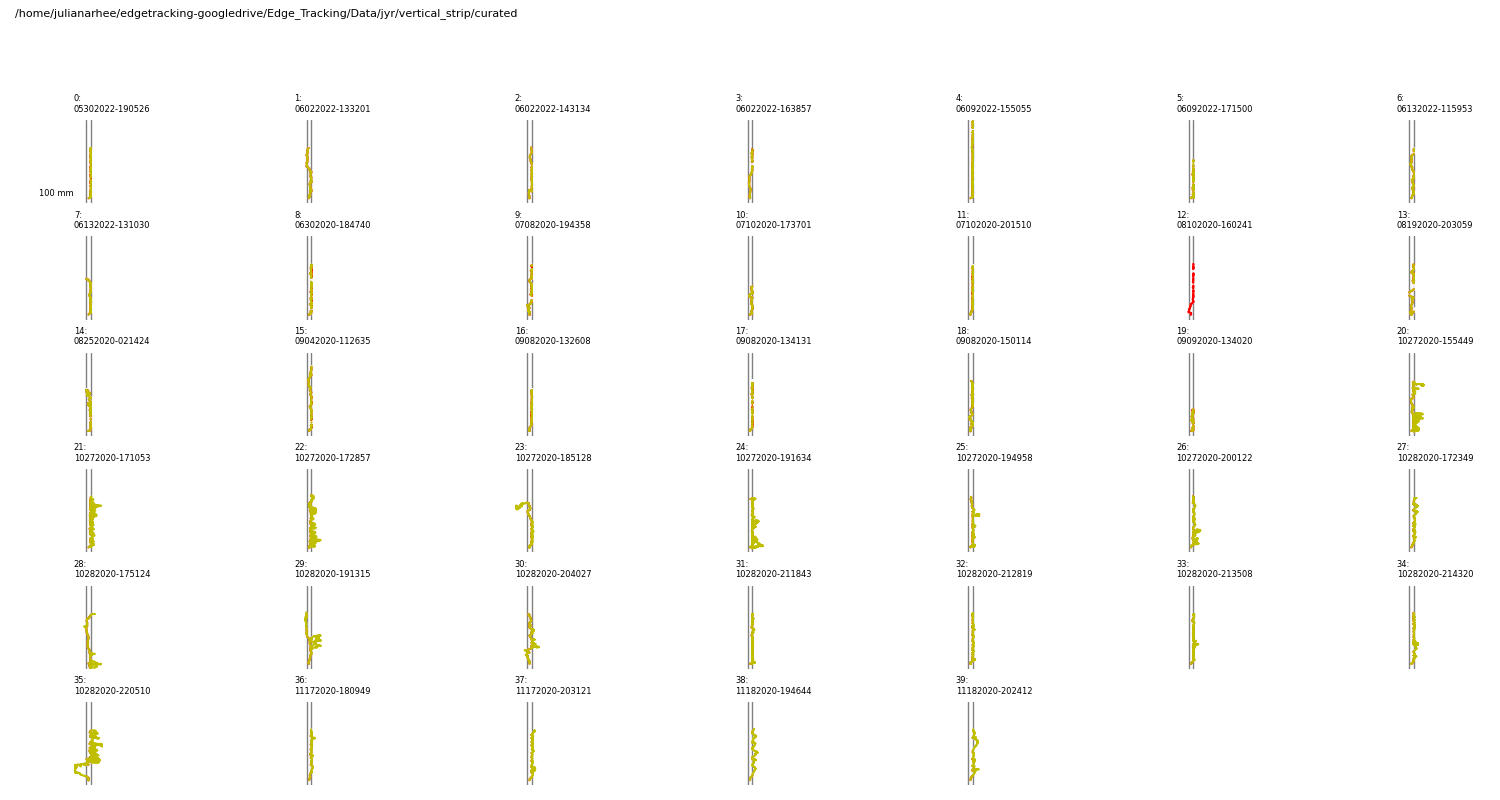

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated/ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40


In [299]:
plot_flipped=True
bool_colors=['r', 'y']
bool_vars = ['instrip', 'led_on']
nr=6
nc = 7
# ---------------------------------------------------
if plot_flipped:
    #curr_figdir = os.path.join(srcdir, 'ets')
    fig = putil.plot_array_of_trajectories(df_fp, nr=nr, nc=nc, bool_colors=bool_colors, bool_vars=bool_vars, title='fly_id')
    util.label_figure(fig, figid)
    pl.savefig(os.path.join(curr_figdir, 'trajectories_fp{}.png'.format(plot_st)))
print(curr_figdir)

# Zero trajectories

In [92]:
df_z = [putil.zero_trajectory(df_) for fn, df_ in etdf.groupby('filename')]
etdf_zero = pd.concat(df_z).reset_index(drop=True)

midp = strip_width/2
# includd dist_from_edge
etdf_zero['dist_from_edge'] = etdf_zero['ft_posx'] - midp
etdf_zero['dist_from_edge_abs'] = abs(etdf_zero['dist_from_edge'])
etdf_zero.loc[etdf_zero['instrip'], 'dist_from_edge_abs'] = (midp - etdf_zero.loc[etdf_zero['instrip'], 'ft_posx']) 
# abs( etdf_multi_zero['ft_posx'] ) - 25

In [115]:
boutdf.columns

Index(['duration', 'upwind_dist_range', 'upwind_dist_firstlast',
       'crosswind_dist_range', 'crosswind_dist_firstlast', 'path_length',
       'path_length_x', 'path_length_y', 'max_dist_from_edge',
       'min_dist_from_edge', 'max_dist_from_edge_abs',
       'min_dist_from_edge_abs', 'rel_time', 'n_frames', 'ft_heading',
       'level_0', 'timestamp -- motor_step_command', 'ft_posx', 'ft_posy',
       'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw', 'filename',
       'timestamp', 'time', 'led_on', 'condition', 'fly_id', 'boutnum',
       'cum_time', 'euclid_dist', 'upwind_dist', 'crosswind_dist',
       'dist_from_edge', 'dist_from_edge_abs', 'speed', 'upwind_speed',
       'crosswind_speed', 'fpath', 'date', 'odor_on', 'strip_type', 'instrip',
       'experiment', 'fly_name', 'trial', 'trial_id', 'index', 'sig_status',
       'epoch', 'bout_type', 'epoch_type'],
      dtype='object')

# Calculate bout metrics

In [131]:
yvarnames = ['duration', 'speed', 'boutnum',
             'path_length', 'path_length_x', 'path_length_y',
            'crosswind_speed', 'crosswind_dist_range', 'crosswind_dist_firstlast',
            'upwind_speed', 'upwind_dist_range', 'upwind_dist_firstlast',
            'max_dist_from_edge_abs', 'ft_posy_max'] #, 'ft_heading']
print(len(yvarnames))

14


In [166]:
etdf_zero['epoch'] = 'ledoff'
etdf_zero['bout_type'] = ['instrip' if v==True else 'outstrip' for v in etdf_zero['instrip'].values]
etdf_zf = traj.filter_first_instrip_last_outstrip(etdf_zero)

In [233]:
etdf_zf['rel_time_bout'] = etdf_zf.groupby(['filename', 'boutnum'], group_keys=False)['rel_time'].apply(lambda x: x - x.iloc[0])


In [237]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [238]:
group_vars = ['fly_id', 'filename', 'boutnum', 'condition']
# boutdf = etdf_zero.groupby(group_vars, as_index=False)\
#                   .apply(butil.calculate_bout_metrics, group_vars=group_vars).unstack()
#numeric = etdf_zero.select_dtypes(include=np.number).columns.tolist()
boutdf = butil.get_bout_metrics(etdf_zf) #,numeric=numeric)
#boutdf_filt = traj.filter_first_instrip_last_outstrip(boutdf)
boutdf_filt =  boutdf.copy()

In [240]:
estimator='median'
# -----------------------
if estimator=='max':
    metrics = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False).max()
elif estimator == 'mean':
    metrics = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False).mean()
else: #estimator should be median
    metrics = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False).median()
metrics['bout_type'] = ['instrip' if v==True else 'outstrip' for v in metrics['instrip']]
metrics['epoch_type'] = ['{}-{}'.format(a, b) for a, b in metrics[['bout_type', 'condition']].values]
# Add max pos
max_y_in_block = etdf_zf.groupby(['fly_id', 'filename', 'epoch', 'instrip'], \
                  as_index=False).apply(lambda x: x['ft_posy'].max() - x['ft_posy'].min()).rename(columns={None: 'ft_posy_max'})

for (fn, ep, ins), df_ in max_y_in_block.groupby(['filename', 'epoch', 'instrip']):
    metrics.loc[(metrics['filename']==fn) 
                & (metrics['epoch']==ep)
                & (metrics['instrip']==ins), 'ft_posy_max'] = float(df_['ft_posy_max'])
    
# add N bouts
nbouts = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False)['boutnum'].max()
metrics.pop('boutnum')
metrics = metrics.merge(nbouts, on=['fly_id', 'filename', 'condition', 'epoch', 'instrip'],)
#metrics.pop('ft_posy')
#metrics['bout_type'] = ['instrip' if v==True else 'outstrip' for v in metrics['instrip'].values]
print(metrics.shape, metrics.dropna().shape)

/tmp/ipykernel_3745888/1865360922.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metrics = boutdf_filt.groupby(['fly_id', 'filename', 'condition', 'epoch', 'instrip'], as_index=False).median()


(80, 49) (0, 49)


In [241]:
# Merge for easier plotting
meltdf_metrics = pd.melt(metrics, id_vars=['fly_id', 'filename', 'bout_type', 'condition', 'epoch_type'],
               value_vars=yvarnames, value_name='value')
meltdf_metrics['value'] = meltdf_metrics['value'].astype(float)

In [242]:
pvar='boutnum'
xorder = ['instrip-constant', 'instrip-gradient', 'outstrip-constant', 'outstrip-gradient']
epoch_palette = dict((k, instrip_palette[True]) if 'instrip' in k \
                     else (k, instrip_palette[False]) for k in xorder)

In [243]:
print(len(yvarnames))
print(yvarnames)

14
['duration', 'speed', 'boutnum', 'path_length', 'path_length_x', 'path_length_y', 'crosswind_speed', 'crosswind_dist_range', 'crosswind_dist_firstlast', 'upwind_speed', 'upwind_dist_range', 'upwind_dist_firstlast', 'max_dist_from_edge_abs', 'ft_posy_max']


In [244]:
n_flies = metrics['fly_id'].nunique()
n_traj = metrics['filename'].nunique()
print(n_flies, n_traj)

n_const = metrics[metrics['condition']=='constant']['filename'].nunique()
n_grad = metrics[metrics['condition']=='gradient']['filename'].nunique()

40 40


<IPython.core.display.Javascript object>


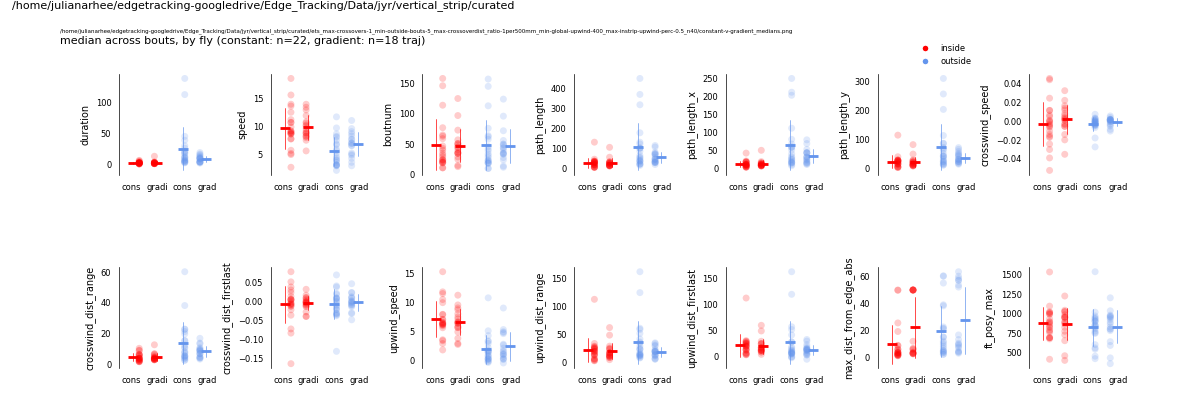

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of t

/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.0, 0.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.39215686274509803, 0.5843137254901961, 0.9294117647058824)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of t

In [300]:
nr=2
nc=7

fig, axn = pl.subplots(nr, nc, figsize=(nc*1.7, nr*2))

for ri, (ax, pvar) in enumerate(zip(axn.flat, yvarnames)):
    currdf = meltdf_metrics[meltdf_metrics['variable']==pvar].copy()
    sns.stripplot(data=currdf, x='epoch_type', y='value', ax=ax, hue='epoch_type', palette=epoch_palette, 
              order=xorder, dodge=True, jitter=False , alpha=0.2, legend=0)
    sns.pointplot(data=currdf, x='epoch_type', y='value', ax=ax, hue='epoch_type', palette=epoch_palette, estimator='mean',
              order=xorder, dodge=True, markers='_', color='w', scale=1, errwidth=0.5, join=False, errorbar='sd', )
    # axes
    putil.set_outward_spines(ax)
    putil.remove_spines(ax, axes=['right', 'top', 'bottom'])

    ax.set_xlabel('')
    ax.set_xticklabels(['cons', 'gradi', 'cons', 'grad'])
    ax.set_ylabel(pvar)

    ax.set_box_aspect(1)
    ax.legend_.remove()

labels = ['inside', 'outside']
colors = [instrip_palette[True], instrip_palette[False]] # for i in labels]
legh = putil.custom_legend(labels, colors, use_line=False, markersize=5)
axn.flat[5].legend(handles=legh, bbox_to_anchor=(1,1), loc='lower right', frameon=False)

pl.tight_layout()
pl.subplots_adjust(left=0.1, right=0.95, top=0.85, hspace=0.5, wspace=0.5)
figname = 'constant-v-gradient_medians'
fig.text(0.05, 0.92, os.path.join(curr_figdir, '{}.png'.format(figname)), fontsize=4)
fig.text(0.05, 0.89, '{} across bouts, by fly (constant: n={}, gradient: n={} traj)'.format(estimator, n_const, n_grad), fontsize=8)

util.label_figure(fig, figid)
pl.savefig(os.path.join(curr_figdir, '{}.png'.format(figname)))


In [301]:
curr_figdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/vertical_strip/curated/ets_max-crossovers-1_min-outside-bouts-5_max-crossoverdist_ratio-1per500mm_min-global-upwind-400_max-instrip-upwind-perc-0.5_n40'

In [258]:
import pingouin as pg

In [262]:
sampledf = pg.read_dataset('mixed_anova')
sampledf

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4
...,...,...,...,...
175,6.176981,June,Meditation,55
176,8.523692,June,Meditation,56
177,6.522273,June,Meditation,57
178,4.990568,June,Meditation,58


In [263]:
meltdf_metrics

,fly_id,filename,bout_type,condition,epoch_type,variable,value
0,20200630-fly184740,06302020-184740,outstrip,gradient,outstrip-gradient,duration,4.584855
1,20200630-fly184740,06302020-184740,instrip,gradient,instrip-gradient,duration,1.819874
2,20200708-fly194358,07082020-194358,outstrip,gradient,outstrip-gradient,duration,15.636971
3,20200708-fly194358,07082020-194358,instrip,gradient,instrip-gradient,duration,3.592912
4,20200710-fly173701,07102020-173701,outstrip,gradient,outstrip-gradient,duration,4.272443
...,...,...,...,...,...,...,...
1115,20220609-fly171500,06092022-171500,instrip,constant,instrip-constant,ft_posy_max,758.812865
1116,20220613-fly115953,06132022-115953,outstrip,constant,outstrip-constant,ft_posy_max,906.337839
1117,20220613-fly115953,06132022-115953,instrip,constant,instrip-constant,ft_posy_max,878.118943
1118,20220613-fly131030,06132022-131030,outstrip,constant,outstrip-constant,ft_posy_max,602.934332


In [269]:
stat_ = meltdf_metrics[meltdf_metrics['variable']=='duration']
aov = pg.mixed_anova(dv='value', between='condition', within='bout_type', subject='filename', effsize='ng2',
                     data=stat_)
aov.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,ng2,eps
0,condition,1257.401,1,38,1257.401,3.670,0.063,0.046,NaN
1,bout_type,4632.398,1,38,4632.398,13.487,0.001,0.151,1.0
2,Interaction,1338.768,1,38,1338.768,3.898,0.056,0.049,NaN


In [270]:
aov = pg.mixed_anova(dv='value', between='condition', within='bout_type', subject='filename', #effsize='ng2',
                     data=stat_)
aov.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,condition,1257.401,1,38,1257.401,3.670,0.063,0.088,NaN
1,bout_type,4632.398,1,38,4632.398,13.487,0.001,0.262,1.0
2,Interaction,1338.768,1,38,1338.768,3.898,0.056,0.093,NaN


In [271]:
pg.pairwise_tests(data=stat_, dv='value', between='condition', within='bout_type', subject='filename')


/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/pingouin/pairwise.py:478: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = data.groupby([subject, f], as_index=False, observed=True, sort=True).mean()
/home/julianarhee/anaconda3/envs/plume/lib/python3.9/site-packages/pingouin/pairwise.py:583: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "Parametric"] = parametric


,Contrast,bout_type,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,bout_type,-,instrip,outstrip,True,True,-3.543210,39.000000,two-sided,0.001044,29.394,-0.786201
1,condition,-,constant,gradient,False,True,2.113123,22.181055,two-sided,0.046069,1.733,0.596765
2,bout_type * condition,instrip,constant,gradient,False,True,-0.355078,24.810253,two-sided,0.725532,0.326,-0.117099
3,bout_type * condition,outstrip,constant,gradient,False,True,2.153121,22.109468,two-sided,0.042477,1.847,0.607892


In [246]:
metrics[metrics['duration']>100]

,fly_id,filename,condition,epoch,instrip,duration,upwind_dist_range,upwind_dist_firstlast,crosswind_dist_range,crosswind_dist_firstlast,...,crosswind_speed,date,odor_on,led_on,index,sig_status,bout_type,epoch_type,ft_posy_max,boutnum
60,20201118-fly194644,11182020-194644,constant,ledoff,False,113.020321,162.590909,162.590909,38.173252,0.000016,...,0.000552,20201118.0,0.0,1.0,NaN,NaN,outstrip,outstrip-constant,855.751901,10.0
62,20201118-fly202412,11182020-202412,constant,ledoff,False,139.059675,125.178006,119.233673,21.256041,0.010006,...,0.002440,20201118.0,0.0,1.0,NaN,NaN,outstrip,outstrip-constant,776.974647,10.0


<IPython.core.display.Javascript object>


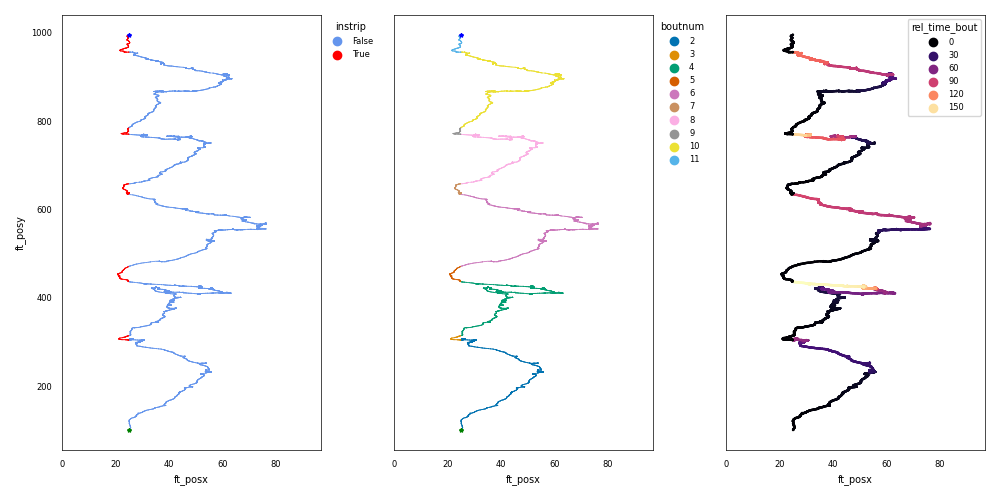

In [249]:
fn = '11182020-194644'
fig, axn = pl.subplots(1, 3, figsize=(10,5), sharex=True, sharey=True)

df_ = etdf_zf[etdf_zf['filename']==fn].copy()
# df_['rel_time_bout'] = df_.groupby('boutnum', group_keys=False)['rel_time'].apply(lambda x: x - x.iloc[0])

ax=axn[0]
butil.plot_trajectory(df_, ax=ax, palette=instrip_palette)

ax=axn[1]
butil.plot_trajectory(df_, ax=ax, hue_varname='boutnum', palette='colorblind')

ax=axn[2]
sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='rel_time_bout', ax=ax, 
                edgecolor='none', palette='magma', s=3)

pl.tight_layout()

In [250]:
etdf_zf.columns

Index(['level_0', 'timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'ft_posx', 'ft_posy',
       'ft_heading', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'filename', 'fpath', 'timestamp', 'motor_step_command', 'time',
       'rel_time', 'date', 'odor_on', 'strip_type', 'led_on', 'instrip',
       'experiment', 'fly_name', 'condition', 'trial', 'fly_id', 'trial_id',
       'boutnum', 'cum_time', 'speed', 'upwind_speed', 'crosswind_speed',
       'euclid_dist', 'upwind_dist', 'crosswind_dist', 'index', 'sig_status',
       'dist_from_edge', 'dist_from_edge_abs', 'epoch', 'bout_type',
       'rel_time_bout'],
      dtype='object')

<IPython.core.display.Javascript object>


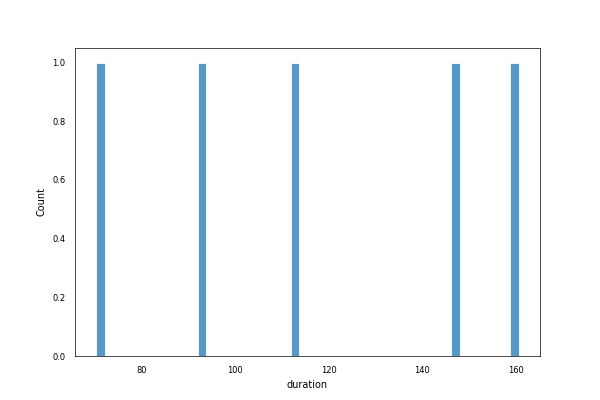

<AxesSubplot: xlabel='duration', ylabel='Count'>

In [251]:
bdf = boutdf[boutdf['filename']==fn].copy()

fig, ax = pl.subplots()
sns.histplot(data=bdf[~bdf['instrip']], x='duration', bins=50) #common_norm=False, kde=True)

In [230]:
bdf.groupby('instrip').median()

/tmp/ipykernel_3745888/1602441541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bdf.groupby('instrip').median()


,duration,upwind_dist_range,upwind_dist_firstlast,crosswind_dist_range,crosswind_dist_firstlast,path_length,path_length_x,path_length_y,max_dist_from_edge,min_dist_from_edge,...,dist_from_edge_abs,speed,upwind_speed,crosswind_speed,date,odor_on,led_on,index,sig_status,rel_time_bout
instrip,,,,,,,,,,,,,,,,,,,,,
False,113.020321,162.590909,162.590909,38.173252,0.000016,368.792473,212.386880,258.537083,38.286017,0.08461,...,0.112673,3.028315,1.540589,0.000552,20201118.0,0.0,1.0,NaN,NaN,0.0
True,3.108644,23.970553,23.966220,3.812570,0.079656,31.545095,11.404631,27.091660,0.059096,-3.49147,...,0.067987,9.165995,7.056700,0.024605,20201118.0,1.0,1.0,NaN,NaN,0.0


In [206]:
metrics[metrics['filename']==fn]

,fly_id,filename,condition,epoch,instrip,duration,upwind_dist_range,upwind_dist_firstlast,crosswind_dist_range,crosswind_dist_firstlast,...,crosswind_speed,date,odor_on,led_on,index,sig_status,bout_type,epoch_type,ft_posy_max,boutnum
60,20201118-fly194644,11182020-194644,constant,ledoff,False,113.020321,162.590909,162.590909,38.173252,0.000016,...,0.000552,20201118.0,0.0,1.0,NaN,NaN,outstrip,outstrip-constant,855.751901,10.0
61,20201118-fly194644,11182020-194644,constant,ledoff,True,3.108644,23.970553,23.966220,3.812570,0.079656,...,0.024605,20201118.0,1.0,1.0,NaN,NaN,instrip,instrip-constant,691.154333,11.0


In [198]:
df_.shape

(36023, 47)

In [171]:
ddf = boutdf[boutdf['filename']==fn].copy()
ddf[ddf['boutnum']==ddf['boutnum'].max()]['instrip']



1343  0    True
Name: instrip, dtype: bool

In [163]:
ddf[ddf['instrip']]['boutnum'].max()

11.0

In [ ]:

fig, axn = pl.subplots(1, len(plot_vars), sharex=True, figsize=(8,3))

for ax, pvar in zip(axn.flat, plot_vars):
    sns.stripplot(data=durlen, x='epoch_type', y=pvar, ax=ax, hue='epoch_type', palette=epoch_palette, 
                  order=xorder, dodge=True, jitter=False , alpha=0.2, legend=0)
    sns.pointplot(data=durlen, x='epoch_type', y=pvar, ax=ax, hue='epoch_type', palette=epoch_palette, estimator='median',
                  order=xorder, dodge=True, markers='_', color='w', scale=1, errwidth=0.5, join=False)
    ax.legend_.remove()
    ax.set_box_aspect(1)
    ax.set_xlabel('')
    # stats
    for bi, bout in enumerate(['instrip', 'outstrip']):
        a = durlen[durlen['epoch_type']=='{}-ledoff'.format(bout)][pvar].values
        b = durlen[durlen['epoch_type']=='{}-ledon'.format(bout)][pvar].values
        ks = st.ks_2samp(a, b)
        stat_string = 'ks: {:.2f}, p: {:.2f}'.format(ks['ks_stat'], ks['p_value'])
        if ks['p_value']<0.05:
            annot = '**' if ks['p_value']<0.01 else '*'
        else:
            annot='n.s.'
        ax.text(bi*2 + 0.5, ax.get_ylim()[-1]*1.2, annot, fontsize=6, ha='center')
    # axes
    putil.set_outward_spines(ax)
    putil.remove_spines(ax, axes=['right', 'top', 'bottom'])

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
    ax.set_xlabel('')
            
pl.subplots_adjust(left=0.1, right=0.95, wspace=0.50)
util.label_figure(fig, fig_id)

curr_figdir = os.path.join(figdir, 'ets')
pl.savefig(os.path.join(curr_figdir, 'bouts_per_sec.png'))